# Huffman Coding

The aim is to obtain the **Huffman code** for the `tempest.txt` text file of the [`Exercise 1`](../Exercise1_ShannonEntropy/Shannon.ipynb).

The procedure is the following:

1. Compute the probability of the occurrence of each character in the text
   
Considering all the events with no parents:
1. Find the two events with the lowest probability and merge them into a new event (conneting together in a new node); the associated probability of the new event will be the sum of the probabilities of the two original events
2. Iterate until there is only one event left (the root of the tree)




In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the text file

text_file = open('../Exercise1_ShannonEntropy/tempest.txt', 'r')
data_text = text_file.read()
text_file.close()


total_len = len(data_text)

text = [c.lower() for c in data_text]

char_list = list(set(data_text.lower()))  # get the unique characters in the text

occ_dict = {c: data_text.lower().count(c) for c in char_list} # get the number of occurrences of each character
prob_dict = {c: data_text.lower().count(c)/total_len for c in char_list}  # get the probability of each character


In [3]:
def shannon_entr(prob):
    idx = np.where(prob>0)
    H = -np.sum(prob[idx]*np.log2(prob[idx]))
    return H

def entr_err(prob, n):
    er = np.sqrt( np.sum( (np.log2(np.e*prob))**2 * prob * (1 - prob) /n))
    return er
    
    

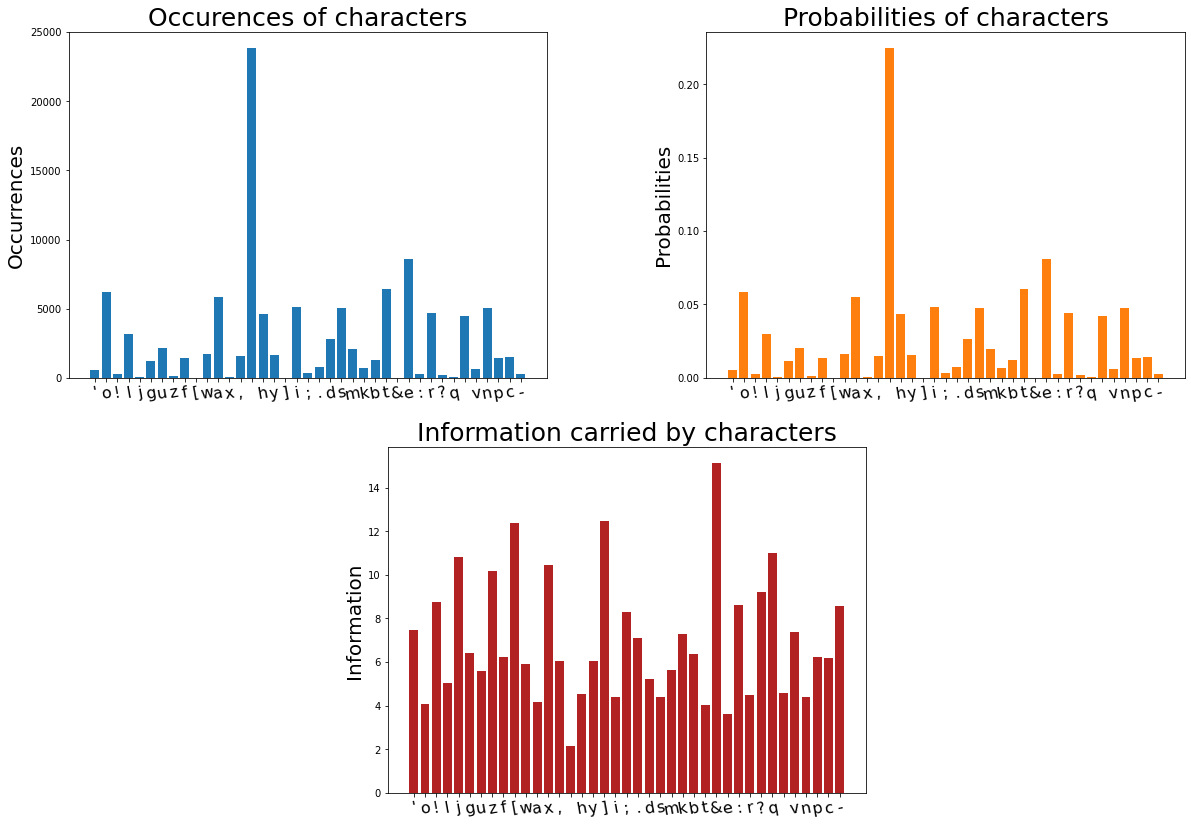

In [9]:
import matplotlib.gridspec as gridspec

gs =gridspec.GridSpec(2,4)
gs.update(wspace = 1)
ax1 = plt.subplot(gs[0,:2], )
ax2 = plt.subplot(gs[0,2:])
ax3 = plt.subplot(gs[1,1:3])


#fig , ax = plt.subplots(1 , 2, figsize=(20,8))

ax1.bar(list(occ_dict.keys()), occ_dict.values())
ax1.set_title("Occurences of characters", fontsize=25)
ax1.set_ylabel("Occurrences" , fontsize=20)
ax1.tick_params(axis='x', which='major', labelsize=16, rotation=10 )




ax2.bar(list(prob_dict.keys()), prob_dict.values(), color='C1')
ax2.set_title("Probabilities of characters", fontsize=25)
ax2.set_ylabel("Probabilities" , fontsize=20)
ax2.tick_params(axis='x', which='major', labelsize=16, rotation=10 )




df = pd.DataFrame.from_dict(prob_dict, orient='index', columns=['Prob'])
df['Information'] = -np.log2(df['Prob'])

ax3.bar(list(df.index) , df['Information'], color='firebrick') 
ax3.set_title("Information carried by characters", fontsize=25)
ax3.set_ylabel("Information" , fontsize=20)

ax3.tick_params(axis='x', which='major', labelsize=16, rotation=10 )

plt.rcParams["figure.figsize"]=(20,14)


In [10]:
shan = shannon_entr(np.array(list(prob_dict.values())))

err = entr_err(np.array(list(prob_dict.values())), total_len)
    
print('The Shannon Entropy of the text is:  H = %2.4f ± %2.4f'  %(shan, err)  )

The Shannon Entropy of the text is:  H = 4.2296 ± 0.0095


In [11]:
class NodeTree(object):
    def __init__(self, left=None, right=None):     # constructor
        self.left = left     # left child
        self.right = right   # right child

    def children(self):     # returns the children of the node
        return self.left, self.right   

    def __str__(self):      # returns the string representation of the node
        return self.left, self.right


def huffman_code_tree(node, binString=''):     # recursive function to get the huffman code
    '''
    Function to find Huffman Code
    '''
    
    if type(node) is str:
        return {node: binString}     # return the binary string
    
    (l, r) = node.children()         # get the children of the node
    
    d = dict()                  # create a dictionary
    d.update(huffman_code_tree(l, binString + '0'))  # add the left child to the dictionary
    d.update(huffman_code_tree(r, binString + '1'))  # add the right child to the dictionary
    
    return d


def make_tree(nodes):      # function to make the tree
    '''
    Function to make tree
    :param nodes: Nodes
    :return: Root of the tree
    '''
    
    while len(nodes) > 1:    # while there is more than one node   
                             
        # have to find the two nodes with the lowest probability                          
        (key1, c1) = nodes[-1]   # get the last node
        (key2, c2) = nodes[-2]   # get the second last node
        
        nodes = nodes[:-2]      # remove the last two nodes
        
        node = NodeTree(key1, key2)    # create a new node with the two nodes as children
        
        nodes.append((node, c1 + c2))  # add the new node to the list of nodes
        nodes = sorted(nodes, key=lambda x: x[1], reverse=True) # sort the list of nodes
        
    return nodes[0][0]              # return the root of the tree

In [12]:
#sort the dictionary, the items() are (char, occurence) so sort by occurence x[1] reverse <-> descending order
freq = sorted(occ_dict.items(), key=lambda x: x[1], reverse=True)  

node = make_tree(freq)   # make the tree
encoding = huffman_code_tree(node)  # get the encoding

huffman_coding_df = pd.DataFrame.from_dict(encoding, orient='index', columns=['Huffman Code'])

Therefore, the obtained **Huffman code** is:

In [13]:
display(huffman_coding_df)

,Huffman Code
n,0000
i,0001
b,001000
j,0010010000
x,0010010001
?,001001001
;,00100101
k,0010011
d,00101
a,0011
